# Active Update Demo

Demonstrates using `deeplenstronomy` in an active learning framework

In [1]:
import deeplenstronomy.deeplenstronomy as dl

## Introduction

First we'll simulate a dataset for which we may want to update some of the parameters.

We'll use a very basic configuration file for this example:

In [2]:
config_file = 'data/demo.yaml'
! cat data/demo.yaml

DATASET:
    NAME: MyDeeplenstronomyDataset
    PARAMETERS:
        SIZE: 100
        OUTDIR: MySimulationResults

COSMOLOGY:
    PARAMETERS:
        H0: 70
        Om0: 0.3

IMAGE:
    PARAMETERS:
        exposure_time: 90
        numPix: 100
        pixel_scale: 0.263
        psf_type: 'GAUSSIAN'
        read_noise: 7
        ccd_gain: 6.083

SURVEY:
    PARAMETERS:
        BANDS: g,r,i,z,Y
        seeing: 0.9
        magnitude_zero_point: 30.0
        sky_brightness: 23.5
        num_exposures: 10

SPECIES:
    GALAXY_1:
        NAME: LENS
        LIGHT_PROFILE_1:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 19.5
                center_x: 0.0
                center_y: 0.0
                R_sersic: 10
                n_sersic: 4
                e1: 0.2
                e2: -0.1
        LIGHT_PROFILE_2:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 18.0
                center_x: 0.0
                center_y: 0

Great, now make the dataset.

In [3]:
dataset = dl.make_dataset(config_file, store_in_memory=False, store_sample=True)

As a reminder of what the `make_dataset()` function does, let's look at the attributes of the `dataset` object.

In [4]:
for x in dir(dataset):
    if not x.startswith('_'): print(x)

CONFIGURATION_1_images
CONFIGURATION_1_metadata
CONFIGURATION_2_images
CONFIGURATION_2_metadata
CONFIGURATION_3_images
CONFIGURATION_3_metadata
CONFIGURATION_4_images
CONFIGURATION_4_metadata
arguments
bands
config_dict
config_file
configurations
name
outdir
parser
regenerate
search
seed
size
species_map
update_param
update_param_dist


We'll be spending a lot of time looking at `update_param`, `update_param_dist`, and `regenerate`, but for now let's check out the actual image and it's metadata. The dataset size was 1 in the config file, so there will only be one image to look at.

In [5]:
from deeplenstronomy.visualize import view_image_rgb

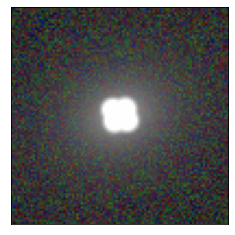

In [6]:
view_image_rgb(dataset.CONFIGURATION_1_images[0], Q=10, stretch=10)

In [7]:
for col in dataset.CONFIGURATION_1_metadata.columns:
    if col[-1] == 'g':
        print(col[0:-2], ':', dataset.CONFIGURATION_1_metadata[col].values[0])

OBJID : 0
H0 : 70
Om0 : 0.3
exposure_time : 90
numPix : 100
pixel_scale : 0.263
psf_type : GAUSSIAN
read_noise : 7
ccd_gain : 6.083
seeing : 0.9
magnitude_zero_point : 30.0
sky_brightness : 23.5
num_exposures : 10
NUMBER_OF_NOISE_SOURCES : 1
NOISE_SOURCE_1-NAME : POISSON_NOISE
NOISE_SOURCE_1-mean : 2.0
CONFIGURATION_LABEL : CONFIGURATION_1
CONFIGURATION_NAME : GALAXY_AGN
NUMBER_OF_PLANES : 2
PLANE_1-NUMBER_OF_OBJECTS : 1
PLANE_1-OBJECT_1-NAME : LENS
PLANE_2-NUMBER_OF_OBJECTS : 2
PLANE_2-OBJECT_1-NAME : SOURCE
PLANE_2-OBJECT_2-NAME : AGN
PLANE_1-OBJECT_1-REDSHIFT : 0.2
PLANE_1-OBJECT_1-NUMBER_OF_LIGHT_PROFILES : 2
PLANE_1-OBJECT_1-NUMBER_OF_SHEAR_PROFILES : 1
PLANE_1-OBJECT_1-NUMBER_OF_MASS_PROFILES : 1
PLANE_1-OBJECT_1-HOST : None
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-NAME : SERSIC_ELLIPSE
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude : 19.5
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_x : 0.0
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_y : 0.0
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-R_sersic : 10
PLANE_1-OBJ

## Updating Parameters

Let's take a look at the `update_param()` function to see how it works.

In [8]:
print(help(dataset.update_param))

Help on method update_param in module deeplenstronomy.deeplenstronomy:

update_param(new_param_dict, configuration) method of deeplenstronomy.deeplenstronomy.Dataset instance
    Update single parameters to new values
    
    :param new_param_dict: {'param_1_name': new_value_1, 'param_2_name': new_value_2, ...}
    :param configuration: like 'CONFIGURATION_1', 'CONFIGURATION_2', etc...

None


So let's suppose we want to change `num_exposures` to 3 and force the source galaxy to be 3 arc sec to the right. From the metadata columns in the above list, create a dictionary with the parameter and new value.

In [9]:
new_param_dict = {'num_exposures': 3, 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_x': 3.0}

And now just call the update function. You will always need to specify the configuration, so if you want to make the change for all configurations, just run the update function in a loop.

In [10]:
dataset.update_param(new_param_dict, 'CONFIGURATION_1')

To see if that worked, let's print out the dataset's `config_dict`, which stores all the info about the dataset.

In [11]:
dataset.config_dict

{'DATASET': {'NAME': 'MyDeeplenstronomyDataset',
  'PARAMETERS': {'SIZE': 100, 'OUTDIR': 'MySimulationResults'}},
 'COSMOLOGY': {'PARAMETERS': {'H0': 70, 'Om0': 0.3}},
 'IMAGE': {'PARAMETERS': {'exposure_time': 90,
   'numPix': 100,
   'pixel_scale': 0.263,
   'psf_type': 'GAUSSIAN',
   'read_noise': 7,
   'ccd_gain': 6.083}},
 'SURVEY': {'PARAMETERS': {'BANDS': 'g,r,i,z,Y',
   'seeing': 0.9,
   'magnitude_zero_point': 30.0,
   'sky_brightness': 23.5,
   'num_exposures': 3}},
 'SPECIES': {'GALAXY_1': {'NAME': 'LENS',
   'LIGHT_PROFILE_1': {'NAME': 'SERSIC_ELLIPSE',
    'PARAMETERS': {'magnitude': 19.5,
     'center_x': 0.0,
     'center_y': 0.0,
     'R_sersic': 10,
     'n_sersic': 4,
     'e1': 0.2,
     'e2': -0.1}},
   'LIGHT_PROFILE_2': {'NAME': 'SERSIC_ELLIPSE',
    'PARAMETERS': {'magnitude': 18.0,
     'center_x': 0.0,
     'center_y': 0.0,
     'R_sersic': 3,
     'n_sersic': 8,
     'e1': 0.05,
     'e2': -0.05}},
   'MASS_PROFILE_1': {'NAME': 'SIE',
    'PARAMETERS': {'theta

As you can see the parameters have been updated. Now to regenerate the dataset, let's check out the `regenerate()` function.

In [12]:
print(help(dataset.regenerate))

Help on method regenerate in module deeplenstronomy.deeplenstronomy:

regenerate(**make_dataset_args) method of deeplenstronomy.deeplenstronomy.Dataset instance
    Using the dictionary stored in self.config_dict, make a new dataset
    
    :param make_dataset_args: dict, arguments supplied to make_dataset when original dataset was generated

None


The regenerate function will automatically use the same parameters that were supplied in the original call to `deeplenstronomy.make_dataset()`.

In [13]:
dataset.regenerate()

To really convince ourselves that this worked, let's look at the image again.

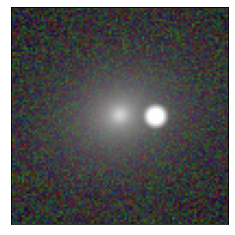

In [14]:
view_image_rgb(dataset.CONFIGURATION_1_images[0], Q=10, stretch=10)

While it's tough to tell by eye that the `num_exposures` was updated, we can see the source galaxy has been moved 3 arcseconds to the right. Woohoo! 

Next, let's say we want a parameter to be drawn from a distribution, and we want to update the characteristics of that distribution. In this case, we'll use the `update_param_dist()` function.

In [15]:
print(help(dataset.update_param_dist))

Help on method update_param_dist in module deeplenstronomy.deeplenstronomy:

update_param_dist(new_param_dist_dict, configuration) method of deeplenstronomy.deeplenstronomy.Dataset instance
    Update the distribution from which a parameter is drawn
    
    :param new_param_dist_dict: should look like this:
        {'param_1_name': {'name': 'uniform', 
                          'parameters': {'minimum': new_value_1, 
                                         'maximum': new_value_2}},
         'param_2_name': {'name': 'uniform', 
                          'parameters': {'minimum': new_value_3, 
                                         'maximum': new_value_4}}, ...}
    :param configuration: like 'CONFIGURATION_1', 'CONFIGURATION_2', etc...

None


So let's suppose that after some analysis we've decided the source galaxy's center_y parameter should be drawn from a uniform distribution on the interval [4, -2].

In [16]:
new_param_dist_dict = {'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_y': {'name': 'uniform',
                                                                     'parameters': {'minimum': -4, 
                                                                                    'maximum': -2}}}
dataset.update_param_dist(new_param_dist_dict, 'CONFIGURATION_1')

Again, we can verify that the change was implemented by looking at the configuration dictionary:

In [17]:
dataset.config_dict

{'DATASET': {'NAME': 'MyDeeplenstronomyDataset',
  'PARAMETERS': {'SIZE': 100, 'OUTDIR': 'MySimulationResults'}},
 'COSMOLOGY': {'PARAMETERS': {'H0': 70, 'Om0': 0.3}},
 'IMAGE': {'PARAMETERS': {'exposure_time': 90,
   'numPix': 100,
   'pixel_scale': 0.263,
   'psf_type': 'GAUSSIAN',
   'read_noise': 7,
   'ccd_gain': 6.083}},
 'SURVEY': {'PARAMETERS': {'BANDS': 'g,r,i,z,Y',
   'seeing': 0.9,
   'magnitude_zero_point': 30.0,
   'sky_brightness': 23.5,
   'num_exposures': 3}},
 'SPECIES': {'GALAXY_1': {'NAME': 'LENS',
   'LIGHT_PROFILE_1': {'NAME': 'SERSIC_ELLIPSE',
    'PARAMETERS': {'magnitude': 19.5,
     'center_x': 0.0,
     'center_y': 0.0,
     'R_sersic': 10,
     'n_sersic': 4,
     'e1': 0.2,
     'e2': -0.1}},
   'LIGHT_PROFILE_2': {'NAME': 'SERSIC_ELLIPSE',
    'PARAMETERS': {'magnitude': 18.0,
     'center_x': 0.0,
     'center_y': 0.0,
     'R_sersic': 3,
     'n_sersic': 8,
     'e1': 0.05,
     'e2': -0.05}},
   'MASS_PROFILE_1': {'NAME': 'SIE',
    'PARAMETERS': {'theta

Now all that's left to do is regenerate the dataset and check out the results.

In [18]:
dataset.regenerate()

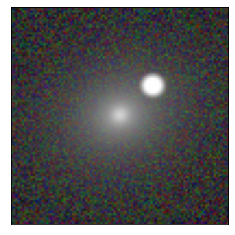

In [19]:
view_image_rgb(dataset.CONFIGURATION_1_images[0], Q=10, stretch=10)

## Summary

With the ability to update the parameters of a dataset and regenerate it programatically, you should be able to arrive at a finalized dataset through the optimization of a metric of your choice.